In [12]:
# %pip install imbalanced-learn


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [14]:
cols =['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3long', 'fM3Trans', 'fAlpha', 'fDist', 'class'] 

In [15]:
df = pd.read_csv('./magic_gamma_telescope/magic04.data', names=cols)
df['class'] = (df['class'] == 'g').astype(int)

In [16]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


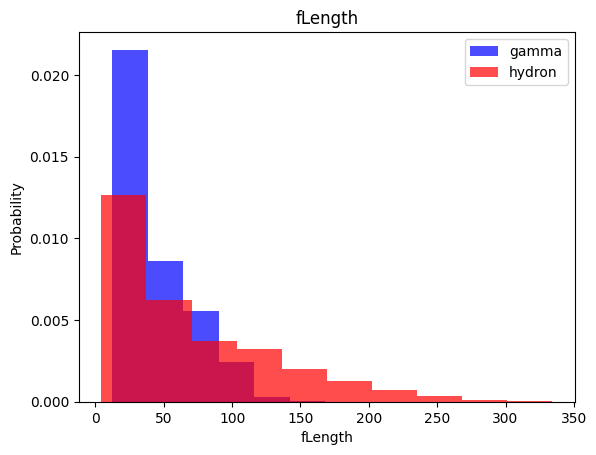

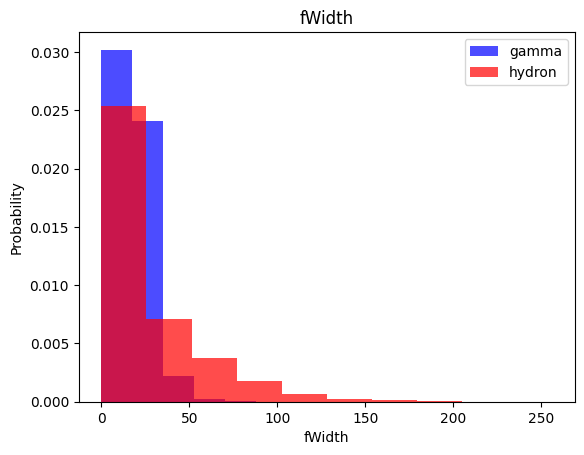

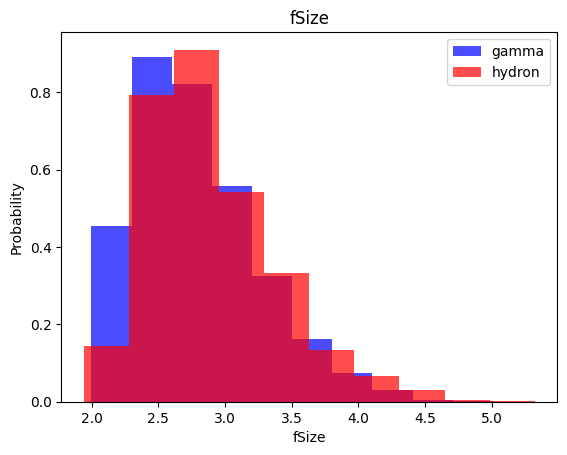

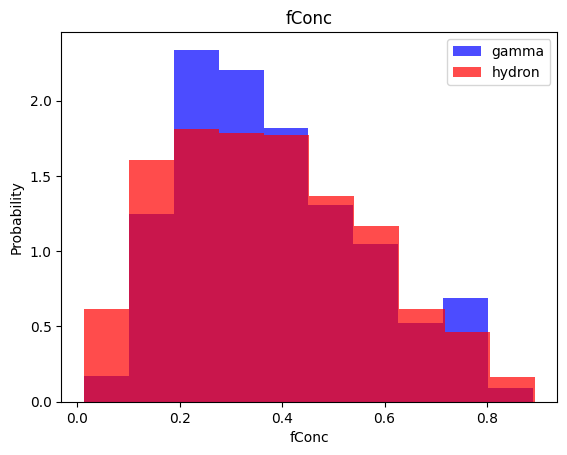

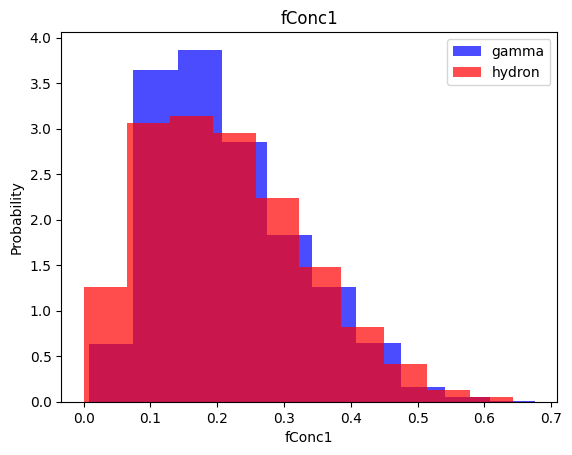

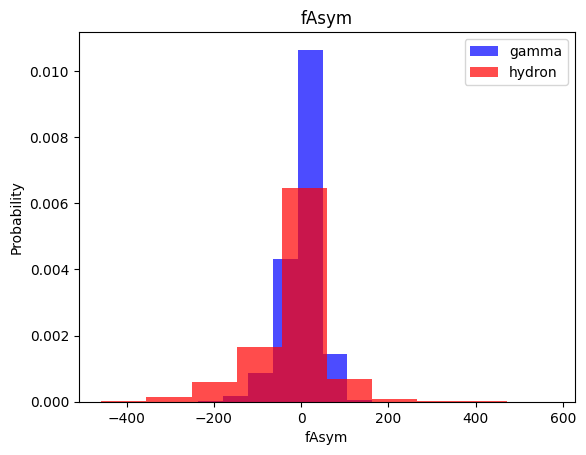

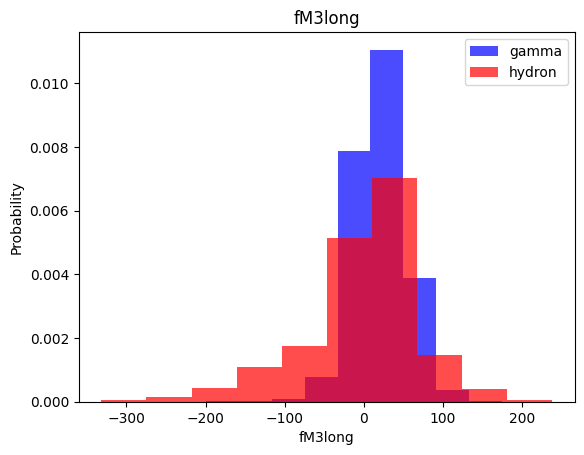

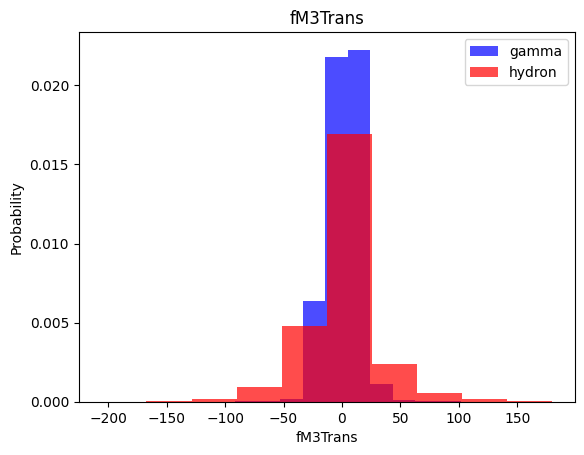

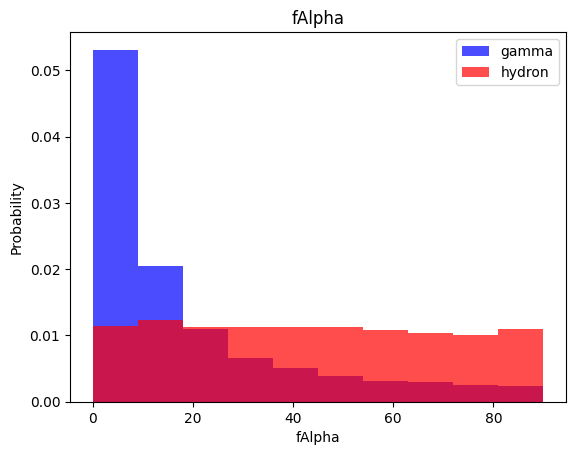

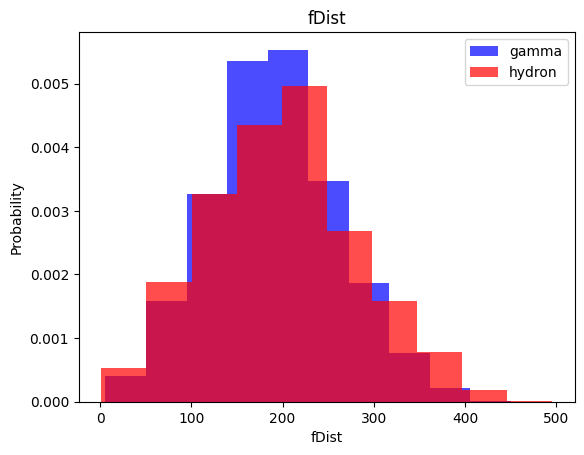

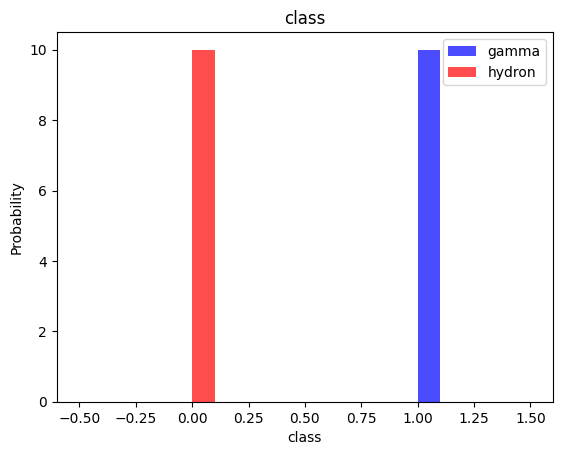

In [17]:
for label in cols:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hydron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [18]:
train , valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Lenovo\anaconda3\envs\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

In [20]:
train , X_train, y_train = scale_dataset(train, oversample=True)
valid , X_tvalid, y_tvalid = scale_dataset(valid, oversample=False)
test , X_test, y_test = scale_dataset(test, oversample=False)

In [21]:
len(y_train)

14730

In [22]:
print(sum(y_train == 1), sum(y_train == 0))

7365 7365


# Classification

### K-Nearest Neughbour

Uses eucline distance

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn_model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1305
           1       0.87      0.85      0.86      2499

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes

probabiliy and args max MAP


In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52      1305
           1       0.75      0.89      0.81      2499

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### Logistics Regression

Sigmoid

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [37]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71      1305
           1       0.86      0.81      0.83      2499

    accuracy                           0.79      3804
   macro avg       0.76      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Support Vector Machine

best supporting hyperplane

In [39]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC()
smv_model = svm_model.fit(X_train, y_train)

In [43]:
y_pred =svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1305
           1       0.90      0.89      0.90      2499

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



### Neural Network


In [44]:
import tensorflow as tf

In [46]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='vL_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss= 'binary_crossentropy', metrics=['accuracy'])

c:\Users\Lenovo\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
history = nn_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7394 - loss: 0.5226 - val_accuracy: 0.6599 - val_loss: 0.5630
Epoch 2/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8270 - loss: 0.3818 - val_accuracy: 0.7023 - val_loss: 0.5372
Epoch 3/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8435 - loss: 0.3595 - val_accuracy: 0.7013 - val_loss: 0.5649
Epoch 4/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8546 - loss: 0.3446 - val_accuracy: 0.7312 - val_loss: 0.5273
Epoch 5/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8528 - loss: 0.3400 - val_accuracy: 0.7427 - val_loss: 0.5026
Epoch 6/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8608 - loss: 0.3334 - val_accuracy: 0.7797 - val_loss: 0.4403
Epoch 7/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8660 - loss: 0.3219 - val_accuracy: 0.7305 - val_loss: 0.5031
Epoch 8/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8606 - loss: 0.3268 - val_accuracy: 0.